# 1. 문제 정의

* 문제 상황 : 저출산 관련 문제가 부상하여 출산율을 예측해 보고 싶다.

* 문제 정의 : 경제 상황, 취업률 등의 데이터를 바탕으로 출산율을 예측한다.

# 2. 데이터 수집

* 데이터 수집 출처 : [e-나라지표](https://www.index.go.kr/main.do?cate=1)
  * [합계출산율](https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1428)
  * [국내총생산 및 경제성장률 (GDP)](https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=2736)
  * [취업자 수/실업률 추이](https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1063)

* 파일명
  * `합계출산율_1970_2020.xls`
  * `국내총생산_및_경제성장률_(GDP)_1970_2020.xls`
  * `취업자_수_실업률_추이_1990_2020.xls`

* 독립변수 : 2개

  * GDP : 국내총생산(명목GDP)
  * EmpRate : 취업자 증감

* 종속변수 : BirthRate

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 데이터 가져오기
import numpy as np
import pandas as pd

df_birth = pd.read_excel('/content/drive/MyDrive/datasets/birth_rate/합계출산율_1970_2020.xls')
df_gdp = pd.read_excel('/content/drive/MyDrive/datasets/birth_rate/국내총생산_및_경제성장률_(GDP)_1970_2020.xls')
df_emp = pd.read_excel('/content/drive/MyDrive/datasets/birth_rate/취업자_수_실업률_추이_1990_2020.xls')
for df in [df_birth, df_gdp, df_emp]:
  print(df.shape)

(6, 52)
(7, 52)
(15, 32)


In [3]:
df_birth

,통계표명:,합계 출산율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,단위:,"천명, 가임여자 1명당 명",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1970,1971,1972.00,1973.00,1974.00,1975.00,1976.0,1977.00,1978.00,1979.0,1980.00,1981.00,1982.00,1983.00,1984.00,1985.00,1986.00,1987.00,1988.00,1989.00,1990.00,1991.00,1992.00,1993.000,1994.000,1995.000,1996.000,1997.000,1998.000,1999.000,2000.00,2001.000,2002.000,2003.000,2004.000,2005.000,2006.000,2007.000,2008.000,2009.000,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.00
2,출생아 수,"1,007.0","1,025.0",953.00,966.00,923.00,874.00,796.0,825.00,751.00,863.0,863.00,867.00,848.00,769.00,675.00,655.00,636.00,624.00,633.00,639.00,650.00,709.00,731.00,716.000,721.000,715.000,691.000,675.400,641.600,620.700,640.10,559.900,496.900,495.000,477.000,438.700,451.800,496.800,465.900,444.800,470.200,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
3,합계 출산율,4.530,4.540,4.12,4.07,3.77,3.43,3.0,2.99,2.64,2.9,2.82,2.57,2.39,2.06,1.74,1.66,1.58,1.53,1.55,1.56,1.57,1.71,1.76,1.654,1.656,1.634,1.574,1.537,1.464,1.425,1.48,1.309,1.178,1.191,1.164,1.085,1.132,1.259,1.192,1.149,1.226,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84
4,출처:,"통계청, 『2020년 출생통계(확정), 국가승인통계 제10103호 출생통계』",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,주석:,"* 합계 출산율 (TFR, Total Fertility Rate) : 여성 1명이 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
year = df_birth.iloc[1].loc['합계 출산율':].astype(int).values
birth = df_birth.iloc[2].loc['합계 출산율':].astype(str).apply(lambda x: x.replace(',', '')).astype(float).astype(int).values
birth_rate = df_birth.iloc[3].loc['합계 출산율':].astype(str).apply(lambda x: x.replace(',', '')).astype(float).values
df_birth = pd.DataFrame({
    'year': year,
    'birth': birth,
    'birth_rate': birth_rate
})
df_birth.head()

,year,birth,birth_rate
0,1970,1007,4.53
1,1971,1025,4.54
2,1972,953,4.12
3,1973,966,4.07
4,1974,923,3.77


In [5]:
df_gdp

,통계표명:,국내총생산 및 경제성장률,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,단위:,"십억원, 전년동기비 %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,국내총생산(명목GDP),"2,796.6","3,438.0","4,267.7","5,527.3","7,905.0","10,543.6","14,472.8","18,608.1","25,154.5","32,402.3","39,725.1","49,669.8","57,286.6","68,080.1","78,591.3","88,129.7","102,985.8","121,697.8","145,994.7","165,801.8","200,556.2","242,481.1","277,540.8","315,181.3","372,493.4","436,988.8","490,850.9","542,001.8","537,215.3","591,453.0","651,634.4","707,021.3","784,741.3","837,365.0","908,439.2","957,447.8","1,005,601.5","1,089,660.2","1,154,216.5","1,205,347.7","1,322,611.2","1,388,937.2","1,440,111.4","1,500,819.1","1,562,928.9","1,658,020.4","1,740,779.6","1,835,698.2","1,898,192.6","1,924,498.1","1,933,152.4"
3,경제성장률(실질GDP성장률),10.1,10.5,7.2,14.9,9.5,7.8,13.2,12.3,11.0,8.7,-1.6,7.2,8.3,13.4,10.6,7.8,11.3,12.7,12.0,7.1,9.9,10.8,6.2,6.9,9.3,9.6,7.9,6.2,-5.1,11.5,9.1,4.9,7.7,3.1,5.2,4.3,5.3,5.8,3.0,0.8,6.8,3.7,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.9
4,출처:,한국은행「국민소득」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,주석:,"* 국민총생산(명목, 시장가격)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,"* 실질GDP, 실질성장률은 발표시기(한국은행, GDP속보치 발표)와 명목GDP, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
year = df_gdp.iloc[1].loc['국내총생산 및 경제성장률':].astype(int).values
gdp = df_gdp.iloc[2].loc['국내총생산 및 경제성장률':].astype(str).apply(lambda x: x.replace(',', '')).astype(float).values
real_gdp_rate = df_gdp.iloc[3].loc['국내총생산 및 경제성장률':].astype(str).apply(lambda x: x.replace(',', '')).astype(float).values
df_gdp = pd.DataFrame({
    'year': year,
    'gdp': gdp,
    'real_gdp_rate': real_gdp_rate
})
df_gdp.head()

,year,gdp,real_gdp_rate
0,1970,2796.6,10.1
1,1971,3438.0,10.5
2,1972,4267.7,7.2
3,1973,5527.3,14.9
4,1974,7905.0,9.5


In [7]:
df_emp

,통계표명:,"취업자수, 실업자, 실업률, 청년실업률",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,단위:,"만명, %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,취업자 증감,52.5,56.4,36.0,22.5,61.4,56.6,43.9,36.1,-127.6,35.3,88.2,44.1,61.8,-1.0,46.0,14.9,35.7,37.3,21.4,-8.7,34.5,49.4,42.8,34.5,59.8,28.1,23.1,31.6,9.7,30.1,-21.8
3,- 농림어업,-20.1,-51.2,-5.8,-7.5,-10.1,-8.8,-8.0,-3.8,11.2,-9.5,-3.6,-7.4,-8.6,-13.1,-7.0,-8.8,-4.3,-5.4,-2.2,-3.9,-7.3,-2.4,-3.2,-1.7,-6.7,-10.9,-6.5,0.6,6.2,5.5,5.0
4,- 제조업,2.9,24.5,-17.0,-26.0,3.8,6.0,-9.3,-18.8,-62.0,11.0,27.1,-2.1,-1.8,-4.2,8.9,-6.3,-5.8,-2.4,-3.9,-13.1,20.2,7.8,1.4,7.0,15.2,14.6,-2.1,-1.8,-5.6,-8.1,-5.3
5,- 건설업,20.3,23.4,10.8,1.8,9.9,10.8,7.0,4.4,-44.7,-10.5,10.9,0.6,16.2,7.4,0.9,-1.6,2.4,2.6,-3.5,-9.4,3.4,0.4,2.5,-1.7,4.9,2.5,1.5,11.9,4.7,-1.5,-0.4
6,실업자,-,-,-,-,-,-,-,-,-,-,97.8,89.8,75.1,82.1,86.2,88.7,83.6,79.0,77.6,89.4,92.4,86.3,82.6,80.8,93.9,97.6,100.9,102.3,107.3,106.3,110.8
7,실업률(%),-,-,-,-,-,-,-,-,-,-,4.4,4.0,3.3,3.6,3.7,3.7,3.5,3.2,3.2,3.6,3.7,3.4,3.2,3.1,3.5,3.6,3.7,3.7,3.8,3.8,4.0
8,청년실업자,-,-,-,-,-,-,-,-,-,-,43.0,41.2,36.1,40.3,41.3,38.9,37.2,33.2,31.8,34.8,33.9,32.2,31.2,32.4,37.8,38.9,42.6,42.6,40.8,38.6,37.0
9,청년실업률(%),-,-,-,-,-,-,-,-,-,-,8.1,7.9,7.0,8.0,8.2,8.0,7.9,7.2,7.1,8.0,7.9,7.6,7.5,8.0,9.0,9.1,9.8,9.8,9.5,8.9,9.0


In [8]:
year = df_emp.iloc[1].loc['취업자수, 실업자, 실업률, 청년실업률':].astype(int).values
emp_rate = df_emp.iloc[2].loc['취업자수, 실업자, 실업률, 청년실업률':].astype(str).apply(lambda x: x.replace(',', '')).astype(float).values
df_emp = pd.DataFrame({
    'year': year,
    'emp_rate': emp_rate,
})
df_emp.head()

,year,emp_rate
0,1990,52.5
1,1991,56.4
2,1992,36.0
3,1993,22.5
4,1994,61.4


In [9]:
print(df_birth.shape)
print(df_gdp.shape)
print(df_emp.shape)

(51, 3)
(51, 3)
(31, 2)


In [10]:
# 1990~2020년의 GDP, 취업률, 출산율 데이터

df = pd.DataFrame({
    'year': range(1990, 2020+1),
    'gdp': df_gdp['gdp'].iloc[20:].values,
    'emp_rate': df_emp['emp_rate'].values,
    'birth_rate': df_birth['birth_rate'].iloc[20:].values
})
df.head()

,year,gdp,emp_rate,birth_rate
0,1990,200556.2,52.5,1.570
1,1991,242481.1,56.4,1.710
2,1992,277540.8,36.0,1.760
3,1993,315181.3,22.5,1.654
4,1994,372493.4,61.4,1.656


In [11]:
# 열 정보 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        31 non-null     int64  
 1   gdp         31 non-null     float64
 2   emp_rate    31 non-null     float64
 3   birth_rate  31 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


# 3. 데이터 탐색 및 시각화

In [12]:
# 데이터 날짜 범위 확인하기
print(df_birth.index)
print(df_gdp.index)
print(df_emp.index)

RangeIndex(start=0, stop=51, step=1)
RangeIndex(start=0, stop=51, step=1)
RangeIndex(start=0, stop=31, step=1)


In [13]:
# 데이터 범위 확인하기
df_birth.describe()

,year,birth,birth_rate
count,51.000000,51.000000,51.000000
mean,1995.000000,635.666667,1.880980
std,14.866069,193.414960,0.980884
min,1970.000000,272.000000,0.840000
25%,1982.500000,470.500000,1.198500
50%,1995.000000,640.000000,1.550000
75%,2007.500000,760.000000,2.225000
max,2020.000000,1025.000000,4.540000


In [14]:
df_gdp.describe()

,year,gdp,real_gdp_rate
count,51.000000,5.100000e+01,51.000000
mean,1995.000000,6.383738e+05,6.839216
std,14.866069,6.435061e+05,4.221710
min,1970.000000,2.796600e+03,-5.100000
25%,1982.500000,6.268335e+04,3.200000
50%,1995.000000,4.369888e+05,7.200000
75%,2007.500000,1.121938e+06,10.000000
max,2020.000000,1.933152e+06,14.900000


In [15]:
df_emp.describe()

,year,emp_rate
count,31.000000,31.000000
mean,2005.000000,30.148387
std,9.092121,36.697937
min,1990.000000,-127.600000
25%,1997.500000,22.800000
50%,2005.000000,35.700000
75%,2012.500000,47.700000
max,2020.000000,88.200000


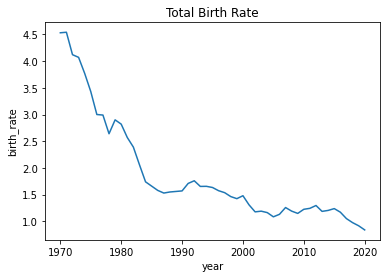

In [16]:
# birth_rate 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Total Birth Rate')
sns.lineplot(x='year', y='birth_rate', data=df_birth)
plt.show()

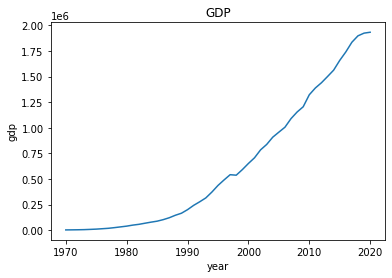

In [17]:
# gdp 그래프 그리기
plt.title('GDP')
sns.lineplot(x='year', y='gdp', data=df_gdp)
plt.show()

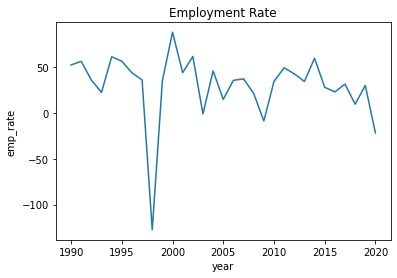

In [18]:
# emp_rate 그래프 그리기
plt.title('Employment Rate')
sns.lineplot(x='year', y='emp_rate', data=df_emp)
plt.show()

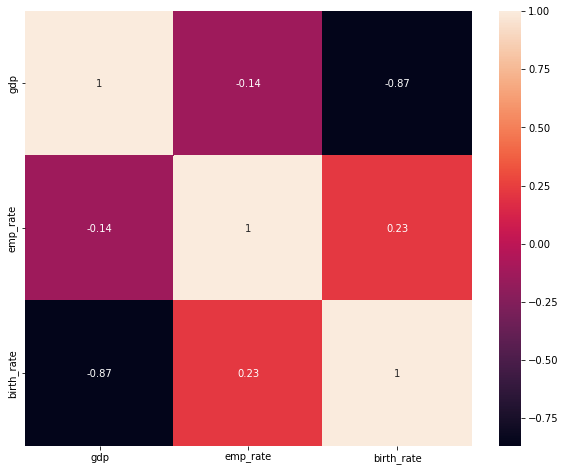

In [19]:
# 특성별 상관관계 보기
plt.figure(figsize=(10, 8))
sns.heatmap(df.loc[:, 'gdp':'birth_rate'].corr(), annot=True)
plt.show()

# 4. 데이터 전처리

* 결측치 확인 후 처리하기

* 특성 스케일링하기

In [20]:
# 결측치 갯수 알아보기
print(df.isnull().sum())
print(df_birth.isnull().sum())
print(df_gdp.isnull().sum())
print(df_emp.isnull().sum())

year          0
gdp           0
emp_rate      0
birth_rate    0
dtype: int64
year          0
birth         0
birth_rate    0
dtype: int64
year             0
gdp              0
real_gdp_rate    0
dtype: int64
year        0
emp_rate    0
dtype: int64


# 5. 모델 학습 및 평가

* 머신러닝 알고리즘 선택 : 선형회귀

* 분류 모델 평가 지표 : 정확도(Accuracy)

In [21]:
# 데이터 분리하기
data = df.loc[:, 'gdp':'birth_rate'].to_numpy()  # to_numpy()를 안해주면 y_test 데이터가 Series로 리턴됨

X_data = data[:, 0:-1]
y_data = data[:, -1]

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=9999)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 2), (7, 2), (24,), (7,))

In [24]:
# 사이킷런 알고리즘 import하기
from sklearn.linear_model import LinearRegression

In [25]:
# Linear Regression으로 학습 후 평가하기
lr = LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7369752030835939
0.8121529944631046


# 6. 모델 개선

* 개선1 : 중요한 특성 1개(GDP)만 골라서 학습시키기 -> 0.80으로 낮아짐
  * 개선 1.1 : 1970년부터의 데이터 활용하기 -> 0.50으로 더욱 낮아짐

In [26]:
# 개선1 : 중요한 특성 1개만 고르기
df2 = df.drop('emp_rate', axis=1)
df2.head()

,year,gdp,birth_rate
0,1990,200556.2,1.570
1,1991,242481.1,1.710
2,1992,277540.8,1.760
3,1993,315181.3,1.654
4,1994,372493.4,1.656


In [27]:
data2 = df2.loc[:, 'gdp':'birth_rate'].to_numpy()  # to_numpy()를 안해주면 y_test 데이터가 Series로 리턴됨

X_data2 = data2[:, 0:-1]
y_data2 = data2[:, -1]

scaler2 = StandardScaler()
X_data2 = scaler2.fit_transform(X_data2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.2, random_state=9999)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((24, 1), (7, 1), (24,), (7,))

In [28]:
# Linear Regression으로 학습 후 평가하기
lr2 = LinearRegression()

lr2.fit(X_train2, y_train2)
print(lr2.score(X_train2, y_train2))
print(lr2.score(X_test2, y_test2))

0.725725614965807
0.7975475341623431


In [29]:
# 개선1.1 : 1970년부터의 데이터 활용하기
df3 = pd.DataFrame({
    'year': range(1970, 2020+1),
    'gdp': df_gdp['gdp'].values,
    'birth_rate': df_birth['birth_rate'].values
})
df3.head()

,year,gdp,birth_rate
0,1970,2796.6,4.53
1,1971,3438.0,4.54
2,1972,4267.7,4.12
3,1973,5527.3,4.07
4,1974,7905.0,3.77


In [30]:
data3 = df3.loc[:, 'gdp':'birth_rate'].to_numpy()

X_data3 = data3[:, [0]]
y_data3 = data3[:, -1]

scaler3 = StandardScaler()
X_data3 = scaler3.fit_transform(X_data3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data3, test_size=0.2, random_state=9999)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((40, 1), (11, 1), (40,), (11,))

In [31]:
# Linear Regression으로 학습 후 평가하기
lr3 = LinearRegression()

lr3.fit(X_train3, y_train3)
print(lr3.score(X_train3, y_train3))
print(lr3.score(X_test3, y_test3))

0.45400057558219264
0.4977274725655253


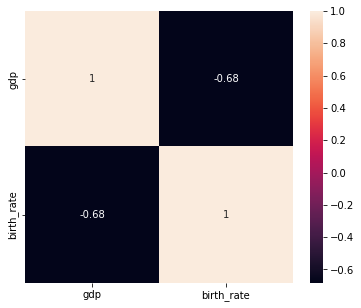

In [32]:
# 결과가 의외로 낮아서
# 특성별 상관관계 보기
plt.figure(figsize=(6, 5))
sns.heatmap(df3.loc[:, 'gdp':'birth_rate'].corr(), annot=True)
plt.show()

# 7. 문제 해결

* 가장 결과가 좋은 lr2 사용
* 2021년 4월 GDP를 입력하여 예측한 결과 0.98의 결과가 나옴

In [33]:
# 2021년 12월 1일 문서 방문
# https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#Table
# IMF.org. International Monetary Fund. April 2021
# South Korea - IMF - 1,806,707
# 2021년 4월 GDP로 출산율 예측하기

test_gdp = [[1806707]]
test_gdp = scaler2.transform(test_gdp)
pred = lr2.predict(test_gdp)
pred

array([0.97547252])

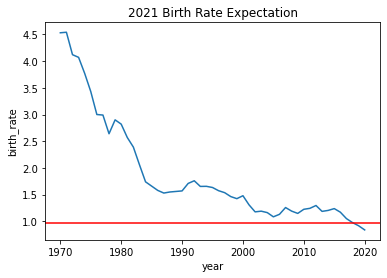

In [34]:
# 기존 출산율과 비교
plt.title('2021 Birth Rate Expectation')
sns.lineplot(x='year', y='birth_rate', data=df_birth)
plt.axhline(pred, color='r')
plt.show()

# 8. 평가

* 일단 문제 정의부터 선형 회귀만으로 해결하기 어려웠다. GDP와 출산율 데이터만 사용한다고 해도 데이터의 개수가 1970~2020년까지 51개밖에 되지 않는다. 그리고 시계열 데이터의 경우 선형 회귀에는 적합하지 않을 수 있는데 무턱대고 선형 회귀로 해결해 보겠다고 한 것이 잘못이었다. 데이터의 개수뿐만 아니라 feature의 개수도 적어 정확도를 80% 이상 높이기 어려웠다.
* 그러나 Kaggle 등에서 제공하는 정형화된 데이터셋을 활용하는 것이 아니라 출산율과 관련 있을 법한 데이터를 직접 수집해 머신러닝 알고리즘을 사용해 보았다는 점이 의미 있었다.
* 한편 출산율이 선형적으로 감소하지 않아서 1990년 이전의 데이터를 사용했을 때 오히려 더 나쁜 결과가 나온 것 같다.
* 취업률의 경우 절대적인 값이 아니라 증감율이기 때문에 학습 중에 거의 활용되지 않은 것 같다. 원래 취업률 외에 다른 데이터도 활용해 보려고 했는데 시간 상 하지 못한 것이 아쉬웠다.